In [66]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

In [67]:
df=pd.read_excel('Election_Data.xlsx')

In [5]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
df.shape

(1525, 10)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


* There are no null values present in the dataset.
* Unnamed:0 is not a useful column and hence we can drop the column.
* There are 7 integer variables excluding Unnamed:0 and there are 2 object variables.
* The dependent variable and the gender variables are object hence it should converted into categorical variables.
* All the independent variables in the data are categorical variables except age 

### Categorical variables with integer datatypes

In [26]:
df['economic.cond.national'].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [27]:
df['economic.cond.household'].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [28]:
df['Blair'].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [29]:
df['Hague'].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [30]:
df['Europe'].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [31]:
df['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

* Changing the datatypes of the above variables into object.
* Deleting the unnecessary column Unnamed:0

In [68]:
cat=['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']

In [69]:
for i in cat:
    df[i]=df[i].astype("object")

In [70]:
df.drop('Unnamed: 0',axis=1, inplace= True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


In [71]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
['age']


In [38]:
df[cat].describe()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525,1525,1525,1525,1525,1525,1525
unique,2,5,5,5,5,11,4,2
top,Labour,3,3,4,2,11,2,female
freq,1063,607,648,836,624,338,782,812


In [39]:
df[num].describe()

,age
count,1525.000000
mean,54.182295
std,15.711209
min,24.000000
25%,41.000000
50%,53.000000
75%,67.000000
max,93.000000


* Here the case of duplication does not exist as different individuals can have same outputs

### Univariate and bivariate analysis

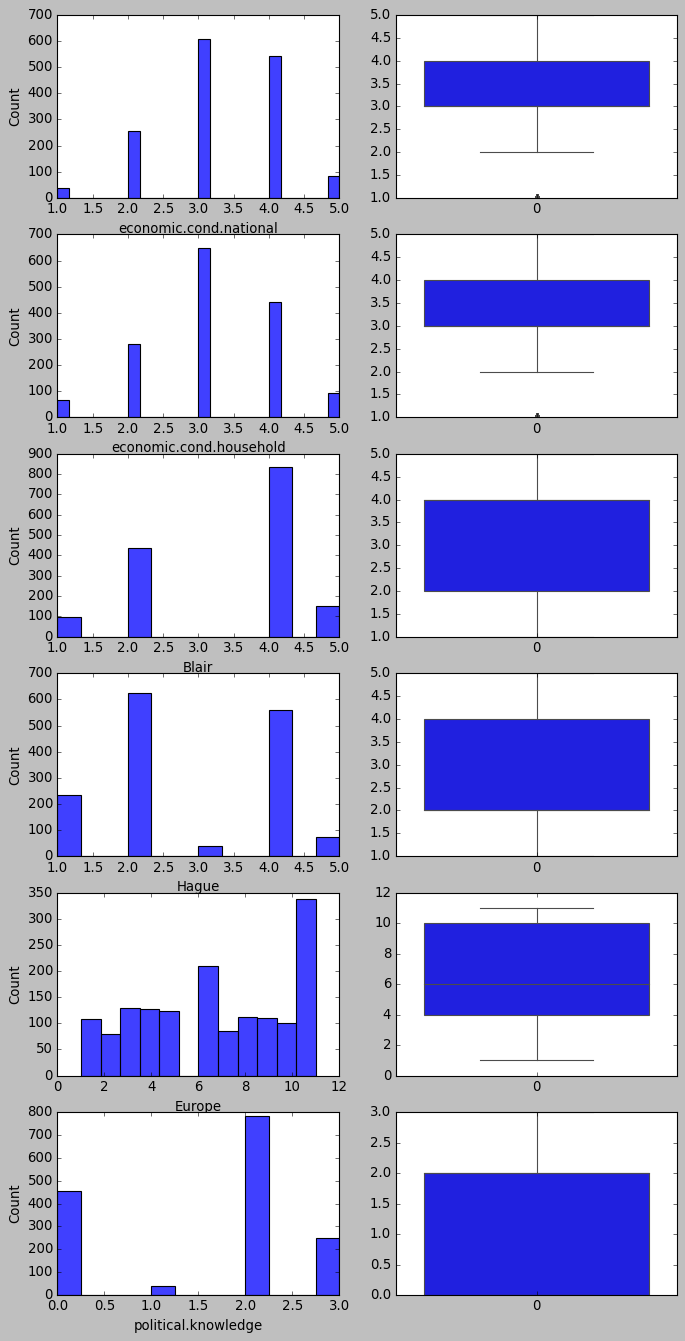

In [48]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(10,20)
a = sns.histplot(df['economic.cond.national'] , ax=axes[0][0])

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[0][1])

a = sns.histplot(df['economic.cond.household'] , ax=axes[1][0])

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[1][1])

a = sns.histplot(df['Blair'] , ax=axes[2][0])

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[2][1])

a = sns.histplot(df['Hague'] , ax=axes[3][0])

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[3][1])

a = sns.histplot(df['Europe'] , ax=axes[4][0])

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[4][1])

a = sns.histplot(df['political.knowledge'] , ax=axes[5][0])

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[5][1])

plt.show()

<Axes: xlabel='age', ylabel='Count'>

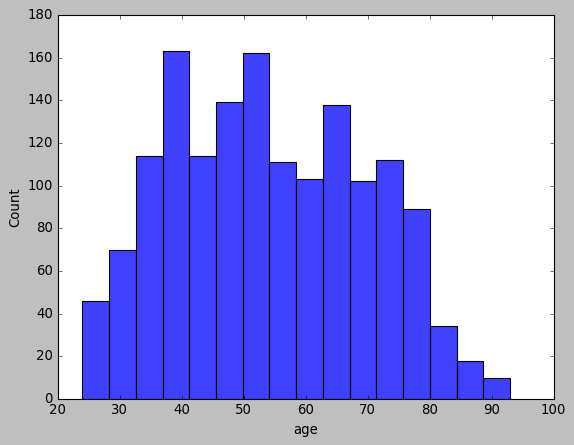

In [46]:
sns.histplot(df['age'])

* economic condition of the nation: 600 has rated 3 and 500+ has rated 4 
* household economic condition: 600 has rated 3 and 400 has rated 4, about 250 has rated 2 
* both economic conditions of the nation and household has similar distribution.
* Blair: Max number of people about 800 people has rated a 4 and 400 has rated 2, no one has rated 3 which means either high support or high opposition for the labour leaders.
* Hague: 200 has rated 1 and 600 has rated 2 and only 400  has rated 4, less support is shown here.
* Europe: about 350 has rated 11 and majority of the people has rated more than 6 which means the majority of people does not support european integration.
* Political knowledge: max number of people have high political knowledge 2 or more than 2.

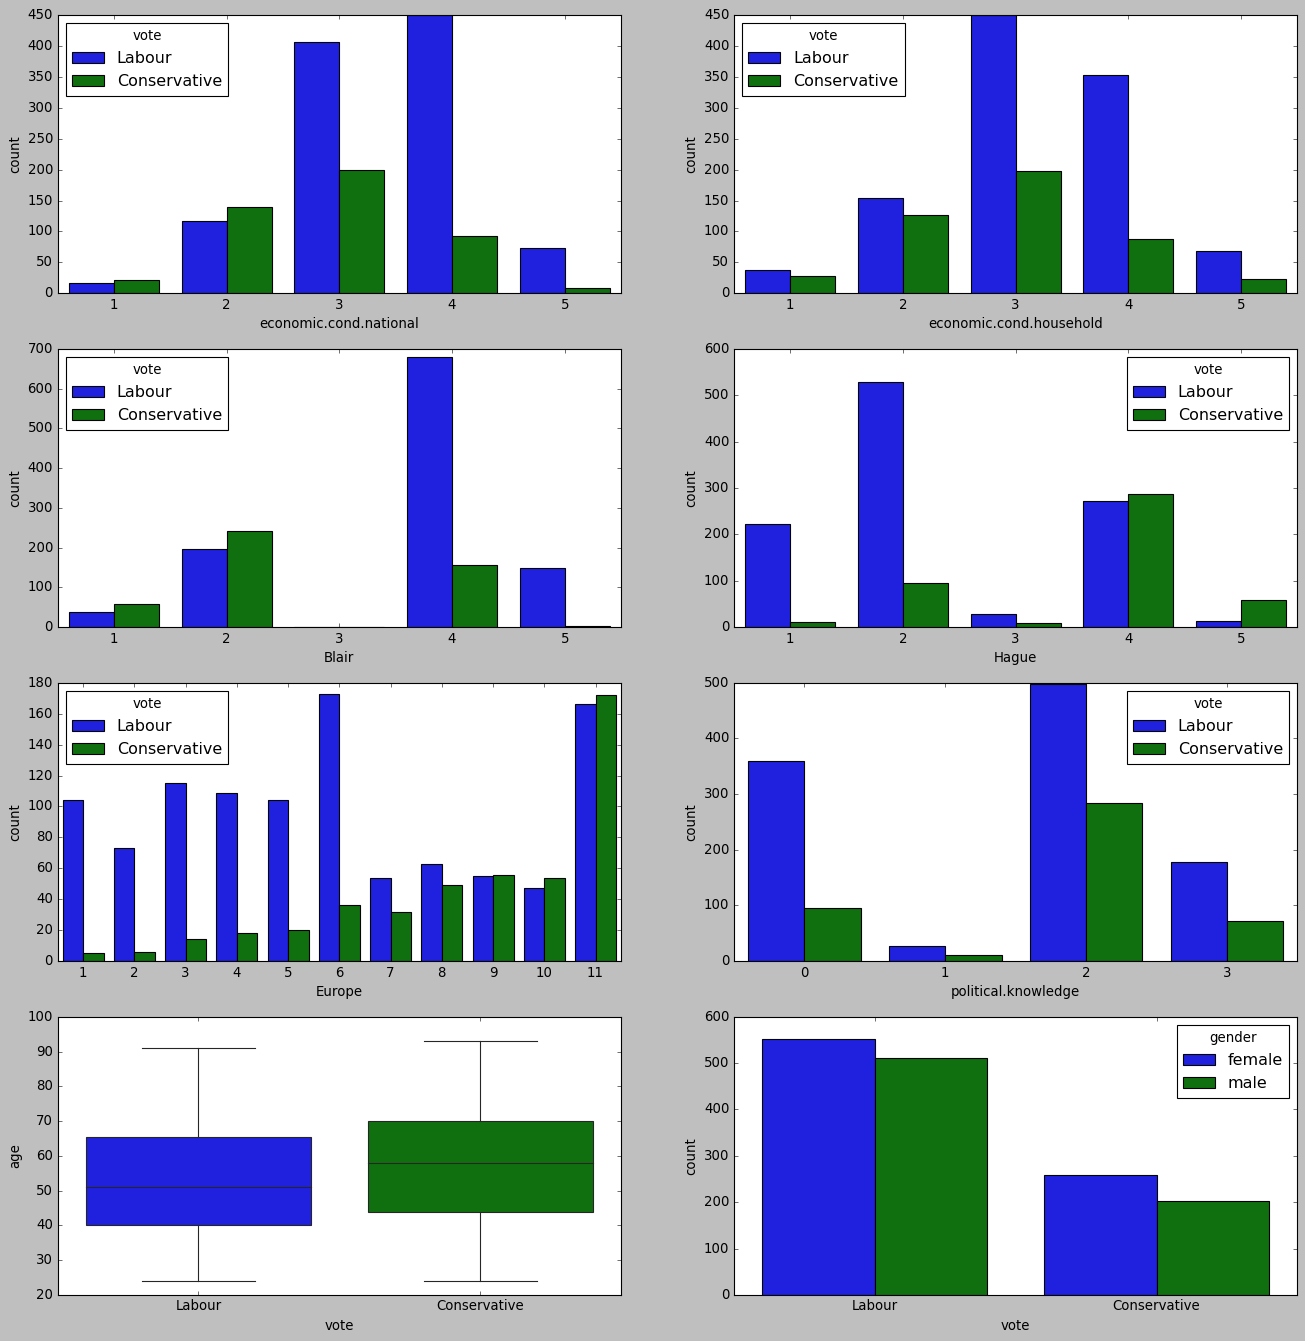

In [60]:
fig, axes= plt.subplots(nrows= 4, ncols=2)
fig.set_size_inches(20,20)
a= sns.countplot(hue =df['vote'], x=df['economic.cond.national'],ax=axes[0][0])   
a= sns.countplot(hue =df['vote'], x=df['economic.cond.household'],ax=axes[0][1])   
a= sns.countplot(hue =df['vote'], x=df['Blair'],ax=axes[1][0])   
a= sns.countplot(hue =df['vote'], x=df['Hague'],ax=axes[1][1])   
a= sns.countplot(hue =df['vote'], x=df['Europe'],ax=axes[2][0])   
a= sns.countplot(hue =df['vote'], x=df['political.knowledge'],ax=axes[2][1])    
a= sns.boxplot(x= df['vote'], y=df['age'],ax=axes[3][0]) 
a= sns.countplot(x= df['vote'], hue=df['gender'],ax=axes[3][1]) 
plt.show()

* Majority of the section who says the economic condition of the nation is good supports labour party and the ones rated 2 supports conservative party.
* Similar pattern is observed in the economic condition of households too.
* People who supports labour party has good assessment of labour leaders, and those who oppose has bad rating for labour leaders
* Similarly people who supports conservative party has good assesment towards conservative leader, and those who oppose has bad rating for conservative leaders.
* People who supports labour party strongly oppose the european integration, while supporters of conservative party highly supports european integration.
* About 400 people who supports the labour party has 0 idea about the partys stand on european integration while the people who supports conservative party are more aware of the party's ideas and propagandas. Even though a large number of people who supports labour party has given a rating of 2.
* From age it is visible that age does not affect the peoples support towards party.
* Gender also doesnt show any relevance as both the party has same proportion of both male and female voters.
* Age and Gender doesnot provide any meaningful predictions for vote.

### Data preprocessing

* There are no missing values or null values in the dataset.
* outliers are not present as most of the data are categorical.

In [72]:
cat1= [ 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge','gender']

In [73]:
df1=pd.get_dummies(df, columns=cat1,drop_first=True)

In [75]:
df1.head().T

,0,1,2,3,4
vote,Labour,Labour,Labour,Labour,Labour
age,43,36,35,24,41
economic.cond.national_2,0,0,0,0,1
economic.cond.national_3,1,0,0,0,0
economic.cond.national_4,0,1,1,1,0
economic.cond.national_5,0,0,0,0,0
economic.cond.household_2,0,0,0,1,1
economic.cond.household_3,1,0,0,0,0
economic.cond.household_4,0,1,1,0,0
economic.cond.household_5,0,0,0,0,0


### Model Building

* For naive bayes classification, it assumes all the data to be normally distributed and they are independent of each other hence scaling is not required for naive bayes classification.
* For KNN we will use zscore method for scaling the data.

#### Train-Test split

In [48]:
X = df1.drop('vote',axis=1)
y = df1["vote"] 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
#Splitting the data into 70:30 train test split.

### Naive bayes classification

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [54]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [55]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          
print(metrics.classification_report(y_train, y_train_predict))  

0.8031865042174321
[[206 126]
 [ 84 651]]
              precision    recall  f1-score   support

Conservative       0.71      0.62      0.66       332
      Labour       0.84      0.89      0.86       735

    accuracy                           0.80      1067
   macro avg       0.77      0.75      0.76      1067
weighted avg       0.80      0.80      0.80      1067



In [56]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                  
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         
print(metrics.classification_report(y_test, y_test_predict))   

0.7816593886462883
[[ 86  44]
 [ 56 272]]
              precision    recall  f1-score   support

Conservative       0.61      0.66      0.63       130
      Labour       0.86      0.83      0.84       328

    accuracy                           0.78       458
   macro avg       0.73      0.75      0.74       458
weighted avg       0.79      0.78      0.78       458



* Accuracy of the train and test data are quite similar.
* The precision and recall for predicting conservative party is very weak in both the models.
* Precision and recall for predicting labour party is very strong in both the models.

#### Since the data consists of only categorical variables except 'age' performing a KNN model is unnecessary as it is a measure of distance between adjacent points and then assigning to the particular class with the shortest distance. Hence KNN can be avoided.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10)

### Bagging

In [167]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [168]:
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[330   1]
 [  0 736]]
              precision    recall  f1-score   support

Conservative       1.00      1.00      1.00       331
      Labour       1.00      1.00      1.00       736

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [169]:
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7947598253275109
[[ 79  52]
 [ 42 285]]
              precision    recall  f1-score   support

Conservative       0.65      0.60      0.63       131
      Labour       0.85      0.87      0.86       327

    accuracy                           0.79       458
   macro avg       0.75      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



* Accuracy of the training data is 99% and for testing data is 79%.
* The recall and precision of the training data is 1.
* In testing data the Precision and recall for conservative party is very low and for labour party is very good.
* The model couldnt perform well in predicting conservative party supporters.

### Boosting

#### ADA boosting

In [60]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [61]:
abc_model = AdaBoostClassifier(random_state=1)
abc_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [62]:
y_train_predict = abc_model.predict(X_train)
abc_model_score =abc_model.score(X_train, y_train)
print(abc_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

Conservative       0.77      0.69      0.73       332
      Labour       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [63]:
y_test_predict = abc_model.predict(X_test)
abc_model_score = abc_model.score(X_test, y_test)
print(abc_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8078602620087336
[[ 85  45]
 [ 43 285]]
              precision    recall  f1-score   support

Conservative       0.66      0.65      0.66       130
      Labour       0.86      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.76      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458



* The accuracy of training data is 84% and for testing data is 82%.
* The model has performed very well in predicting labour party as the precision and recall for training and testing data shows very less variation.
* Even though the precision and recall values for conservative party in the testing data is low when it is compared to the performance of the training data the rate of variation is less. Hence the model is good.

#### Gradient Boosting

In [64]:
gbc_model = GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [65]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score =gbc_model.score(X_train, y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8809746954076851
[[253  79]
 [ 48 687]]
              precision    recall  f1-score   support

Conservative       0.84      0.76      0.80       332
      Labour       0.90      0.93      0.92       735

    accuracy                           0.88      1067
   macro avg       0.87      0.85      0.86      1067
weighted avg       0.88      0.88      0.88      1067



In [66]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8078602620087336
[[ 84  46]
 [ 42 286]]
              precision    recall  f1-score   support

Conservative       0.67      0.65      0.66       130
      Labour       0.86      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.76      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458



* The accuracy of the training data is 88% and for testing data is 80%.
* The model performs similar to the model of Ada boost for predicting labour party.
* In the training data for conservative party the precision and recall values are very high but for the testing data the performance has dropped quite low.

* We can see that the model for Adaboosting is better than the model for gradient boosting.

### Hyperparameter Tuning

### AdaBoost Classifier

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
abc_tuned = AdaBoostClassifier(random_state=1)
parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}
grid_obj = GridSearchCV(abc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
abc_tuned = grid_obj.best_estimator_
abc_tuned.fit(X_train, y_train)

# Fit the best algorithm to the data.
#abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=40, random_state=1)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_train_predict = abc_tuned.predict(X_train)
abc_tuned_score =abc_tuned.score(X_train, y_train)
print(abc_tuned_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8369259606373008
[[221 111]
 [ 63 672]]
              precision    recall  f1-score   support

Conservative       0.78      0.67      0.72       332
      Labour       0.86      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



In [29]:
y_test_predict = abc_tuned.predict(X_test)
abc_tuned_score = abc_tuned.score(X_test, y_test)
print(abc_tuned_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8078602620087336
[[ 81  49]
 [ 39 289]]
              precision    recall  f1-score   support

Conservative       0.68      0.62      0.65       130
      Labour       0.86      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.75      0.76       458
weighted avg       0.80      0.81      0.81       458



* The accuracy of the training data is 84% and for testing data it is 80%.
* The model has not performed well in prediction for the conservative party but did a good job for labour party.
* The model is overfitting the data.

### Gradient boost classifier

In [37]:
gbc_tuned = GradientBoostingClassifier(random_state=1)
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}
grid_obj = GridSearchCV(gbc_tuned, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
gbc_tuned = grid_obj.best_estimator_
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.9, random_state=1, subsample=0.9)

In [38]:
y_train_predict = gbc_tuned.predict(X_train)
gbc_tuned_score =gbc_tuned.score(X_train, y_train)
print(gbc_tuned_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8894095595126523
[[258  74]
 [ 44 691]]
              precision    recall  f1-score   support

Conservative       0.85      0.78      0.81       332
      Labour       0.90      0.94      0.92       735

    accuracy                           0.89      1067
   macro avg       0.88      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [39]:
y_test_predict = gbc_tuned.predict(X_test)
gbc_tuned_score = gbc_tuned.score(X_test, y_test)
print(gbc_tuned_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8100436681222707
[[ 86  44]
 [ 43 285]]
              precision    recall  f1-score   support

Conservative       0.67      0.66      0.66       130
      Labour       0.87      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



* The accuracy of the training data is 89% and for testing data is 81%.
* The precision and recall in the training data has much variation in the testing data and hence the model is overfitting the data.



After tuning the models the performance has dropped as the training and testing data has a huge differrence in the precision and recall values.

#### Comparing all the models

In [43]:
comp_model=pd.read_excel('Comparing models.xlsx')

In [44]:
comp_model

,MODEL,TRAIN ACCURACY,TEST ACCURACY,Unnamed: 3,TRAIN PRECISION,Unnamed: 5,TEST PRECISION,Unnamed: 7,TRAIN RECALL,Unnamed: 9,TEST RECALL
0,NaN,NaN,NaN,Conservative,Labour,Conservative,Labour,Conservative,Labour,Conservative,Labour
1,NAìVE BAYES,80.0,78.0,0.71,0.84,0.61,0.86,0.62,0.89,0.66,0.83
2,BAGGING,100.0,79.0,1,1,0.65,0.85,1,1,0.6,0.87
3,ADA BOOSTING,85.0,82.0,0.78,0.87,0.7,0.87,0.7,0.91,0.6,0.89
4,GRADIENT BOOSTING,88.0,83.0,0.84,0.9,0.73,0.86,0.77,0.93,0.63,0.91
5,ADA BOOSTING TUNED,84.0,81.0,0.78,0.86,0.68,0.86,0.67,0.91,0.62,0.88
6,GRADIENT BOOSTING TUNED,89.0,81.0,0.85,0.9,0.67,0.87,0.789,0.94,0.66,0.87


* From the above comparison of the model models except bagging and gradient boosting tuned models all other models have similar accuracy for their training and testing data.
* Precision and recall for the labour party in both training and testing datasets, all the models have performed good.
* Precision and recall for the conservative party in both training and testing datasets, model performances are poor.
* Here recall has importance as making an error in predicting the vote can change the results of the exit poll.
* Every model has poor performance for its test data for predicting conservative party.
* From the overall evaluation of the model Ada boosting is the ideal model.
* Ada boosting has a test accuracy of 85% with comparatively good precision and recall rates.
* The variation of training score and testing scores are not so huge hence overfitting is reduced in the Ada boosting dataset.

### Final model selection

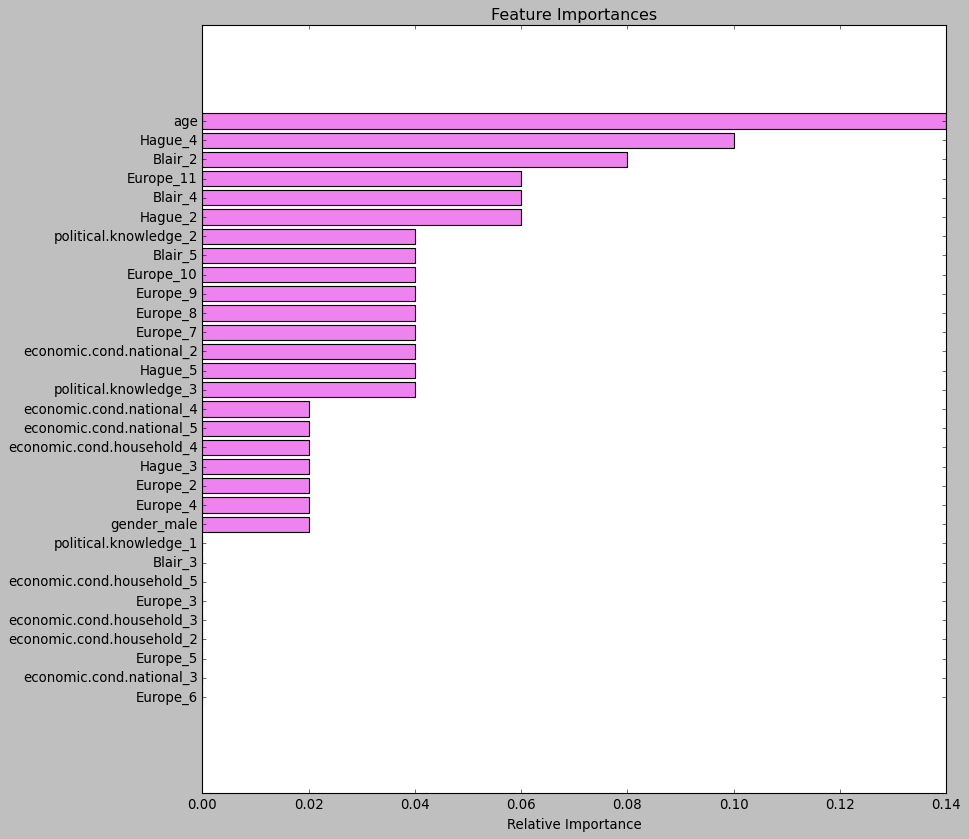

In [67]:
importances = abc_model.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Age is the most important parameter of the model.
* All the models show similar performances.
* Hague4, blair 2 and europe11 has high significance too.

### Insights and Recommendations

* Across all models, the performance for predicting the Conservative Party supporters is consistently poor.
* This suggests that there may be underlying factors or variables not captured by the features used in the models that influence Conservative Party support.
* Models generally perform well in predicting Labour Party supporters, with strong precision and recall rates.
* This indicates that the features used in the models are effective in capturing patterns related to Labour Party support.
* Several models exhibit signs of overfitting, where there's a significant difference between training and testing performance metrics.
* AdaBoosting consistently outperforms other models in terms of test accuracy, precision, and recall for both parties.
* Its ability to reduce overfitting and maintain a balance between training and testing performance makes it the preferred choice.
* Recall, particularly for predicting Conservative Party support, is crucial as errors in prediction can significantly impact the results of exit polls.
* Models should prioritize improving recall for Conservative Party supporters to minimize prediction errors and enhance the reliability of election forecasts.
* Fine-tuning hyperparameters or exploring different feature engineering techniques could potentially enhance the model's predictive performance further.

### Problem 2

In [76]:
import nltk
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [77]:
df2=pd.read_excel('Project_Speech.xlsx')

In [78]:
df2

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [79]:
roosevelt_speech=df2['Speech'][0]
kennedy_speech=df2['Speech'][1]
nixon_speech=df2['Speech'][2]

In [80]:
def count_stats(text):
    num_chars = len(text)
    tokens = word_tokenize(text)
    num_words = len(tokens)
    num_sentences = len(sent_tokenize(text))
    return num_chars, num_words, num_sentences

roosevelt_stats = count_stats(roosevelt_speech)
kennedy_stats = count_stats(kennedy_speech)
nixon_stats = count_stats(nixon_speech)

print("Franklin D. Roosevelt's Speech Stats:")
print("Number of Characters:", roosevelt_stats[0])
print("Number of Words:", roosevelt_stats[1])
print("Number of Sentences:", roosevelt_stats[2])
print()

print("John F. Kennedy's Speech Stats:")
print("Number of Characters:", kennedy_stats[0])
print("Number of Words:", kennedy_stats[1])
print("Number of Sentences:", kennedy_stats[2])
print()

print("Richard Nixon's Speech Stats:")
print("Number of Characters:", nixon_stats[0])
print("Number of Words:", nixon_stats[1])
print("Number of Sentences:", nixon_stats[2])


Franklin D. Roosevelt's Speech Stats:
Number of Characters: 7651
Number of Words: 1453
Number of Sentences: 32

John F. Kennedy's Speech Stats:
Number of Characters: 7673
Number of Words: 1494
Number of Sentences: 27

Richard Nixon's Speech Stats:
Number of Characters: 10106
Number of Words: 1913
Number of Sentences: 20


#### Data cleaning

#### Removing '\\' and'--'

In [94]:
import re
def remove_special_characters(text):
    cleaned_text = re.sub(r'\\+', '', text)  # Remove '\\'
    cleaned_text = re.sub(r'--', '', cleaned_text)  # Remove '--'
    return cleaned_text
roosevelt_cleaned = remove_special_characters(roosevelt_speech)
kennedy_cleaned = remove_special_characters(kennedy_speech)
nixon_cleaned = remove_special_characters(nixon_speech)


In [98]:
print(roosevelt_cleaned[-105:])
print(kennedy_cleaned[-105:])
print(nixon_cleaned[-105:])

 content to stand still. As Americans, we go forward, in the service of our country, by the will of God.n
love, asking His blessing and His help, but knowing that here on earth God's work must truly be our own.n
 in one another, sustained by our faith in God who created us, and striving always to serve His purpose.n


#### Converting to lower case

In [99]:
roosevelt_lower=roosevelt_cleaned.lower()
kennedy_lower=kennedy_cleaned.lower()
nixon_lower=nixon_cleaned.lower()

In [100]:
print(roosevelt_lower[-105:])
print(kennedy_lower[-105:])
print(nixon_lower[-105:])

 content to stand still. as americans, we go forward, in the service of our country, by the will of god.n
love, asking his blessing and his help, but knowing that here on earth god's work must truly be our own.n
 in one another, sustained by our faith in god who created us, and striving always to serve his purpose.n


#### Removing stopwords

In [56]:
import string
roosevelt_tokens = word_tokenize(roosevelt_lower)
kennedy_tokens = word_tokenize(kennedy_lower)
nixon_tokens = word_tokenize(nixon_lower)


stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

In [57]:
roosevelt_filtered = [word for word in roosevelt_tokens if word not in stop_words]
kennedy_filtered = [word for word in kennedy_tokens if word not in stop_words]
nixon_filtered = [word for word in nixon_tokens if word not in stop_words]


print("Roosevelt Speech (Filtered):", roosevelt_filtered[:10])
print("Kennedy Speech (Filtered):", kennedy_filtered[:10])
print("Nixon Speech (Filtered):", nixon_filtered[:10])

Roosevelt Speech (Filtered): ['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united']
Kennedy Speech (Filtered): ['vice', 'president', 'johnson', 'mr.', 'speaker', 'mr.', 'chief', 'justice', 'president', 'eisenhower']
Nixon Speech (Filtered): ['mr.', 'vice', 'president', 'mr.', 'speaker', 'mr.', 'chief', 'justice', 'senator', 'cook']


#### Stemming

In [58]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

roosevelt_stemmed = [porter_stemmer.stem(word) for word in roosevelt_filtered]
kennedy_stemmed = [porter_stemmer.stem(word) for word in kennedy_filtered]
nixon_stemmed = [porter_stemmer.stem(word) for word in nixon_filtered]


print("Roosevelt Speech (Stemmed):", roosevelt_stemmed[:10])
print("Kennedy Speech (Stemmed):", kennedy_stemmed[:10])
print("Nixon Speech (Stemmed):", nixon_stemmed[:10])

Roosevelt Speech (Stemmed): ['nation', 'day', 'inaugur', 'sinc', '1789', 'peopl', 'renew', 'sens', 'dedic', 'unit']
Kennedy Speech (Stemmed): ['vice', 'presid', 'johnson', 'mr.', 'speaker', 'mr.', 'chief', 'justic', 'presid', 'eisenhow']
Nixon Speech (Stemmed): ['mr.', 'vice', 'presid', 'mr.', 'speaker', 'mr.', 'chief', 'justic', 'senat', 'cook']


#### Most common words

In [43]:
from nltk.probability import FreqDist

In [59]:
all_tokens=(roosevelt_stemmed+kennedy_stemmed+nixon_stemmed)
freq_dist = FreqDist(all_tokens)
most_common_words = freq_dist.most_common(3)

In [60]:
print("The three most common words used in all three speeches are:")
for word, frequency in most_common_words:
    print(word, ":", frequency)

The three most common words used in all three speeches are:
us : 45
nation : 37
america : 29


#### Word cloud

In [63]:
from wordcloud import WordCloud

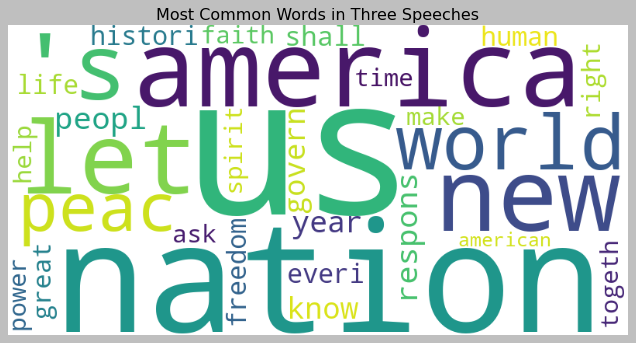

In [64]:
common_words = freq_dist.most_common(30)

wordcloud_dict = {word: freq for word, freq in common_words}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Three Speeches')
plt.show()